In [1]:
from jupyterthemes import jtplot
jtplot.style()

# Linear Model
## Linear Reggression


In [2]:
import numpy as np
X = np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

We try to protect y parameters using X.

We use np.linalg to compute the inverse of a matrix and dot() method for **matrix multiplication**.

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0=1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[3.99986946],
       [2.99256359]])

The actual numbers are 4 and 3. So this estimation is not so far.


Now we can **predict** using this theta best. 

In [5]:
X_new = np.array([[0], [1]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.99986946],
       [6.99243305]])

In [6]:
import matplotlib.pyplot as plt

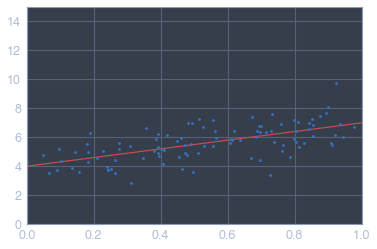

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 1, 0, 15])
plt.show()

#### Equivalent code using scikit-learn 

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
lin_reg.intercept_, lin_reg.coef_

(array([3.99986946]), array([[2.99256359]]))

Actually intercept is theta_0 and coef is other thetas

In [10]:
lin_reg.predict(X_new)

array([[3.99986946],
       [6.99243305]])

Linear regreesion has $O(n^3)$ complexity which n is number of features. Because it should compute matrix production of $(X^T.X)^{-1}$. So it is get very slow when number of features grows large.


On the positive side this equation is linear with number of instances in training set grows (it has $O(m)$ complexity). So it is a good choice to have with large train set.

## Gradient Descent


* When select rate it should'nt be very small or very large. Because then it change speed reaching the minimum.
* Because linear regression model happens to be a convex function it has a unique answer using gradient descent.
* When using linear regression it should have a similiar scale (using std scaler class in sklearn) or else it will take much longer converge.

## Batch Gradient Descent

In [11]:
eta = 0.1 #Learning rate
n_iterations = 1000
m = 1000

theta = np.random.randn(2, 1)
for i in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
theta

array([[3.958751  ],
       [3.06579427]])

## Stochastic Gradient
This approch gradually reduce the learning rate and it also pick a random instance in training set and compute gradient using that.

In [12]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t+t1)
theta = np.random.randn(2, 1) # random init

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2/1 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
theta   

array([[4.70074815],
       [1.74057887]])

## SGD Regressor
This goal can be handled by the sgd regressor. But we should set hyperparameters.

In [13]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter_no_change=n_epochs, eta0=0.1, penalty=None)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=50, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.97021982]), array([2.97657431]))

## Mini-Batch Gradient Descent
Mini batch computes gradient descent from a small random subset of training set. Main advantage of this kind of gradient descent is it can get a performance boot from hardware optimization of matrix computation like GPUs.

# Polynomial Model
## Polynomial Regression
A simple way is to add powers to some variables in model.

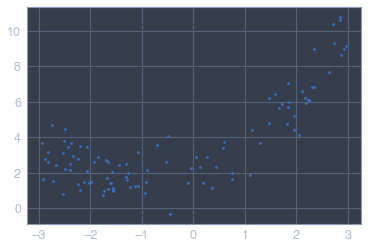

In [15]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, 'b.')

In [16]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]

(array([-2.49634162]), array([-2.49634162,  6.23172147]))

`X_poly` now contains all x features plus square of this feature. Now we can use linear regression on these and select theta matrix.

Here `coef` are features coefficients.

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.09302332]), array([[1.02865135, 0.50360133]]))

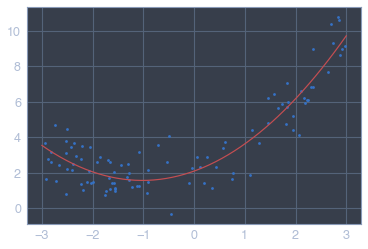

In [18]:
plt.plot(X, y, 'b.')
X_new = np.linspace(-3, 3).reshape(-1, 1)
y_new = lin_reg.predict(poly_features.fit_transform(X_new))
plt.plot(X_new, y_new, 'r-')

#### A model with degree=30.

In [19]:
poly_features_30 = PolynomialFeatures(degree=30, include_bias=False)
X_poly_30 = poly_features_30.fit_transform(X)
lin_reg_30 = LinearRegression()
lin_reg_30.fit(X_poly_30, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(0, 10.0)

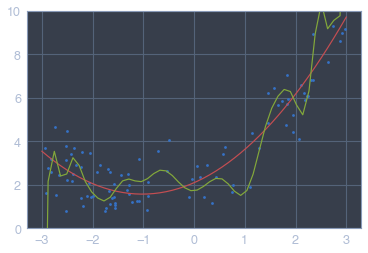

In [20]:
plt.plot(X, y, 'b.')
X_new = np.linspace(-3, 3).reshape(-1, 1)
y_new = lin_reg.predict(poly_features.fit_transform(X_new))
plt.plot(X_new, y_new, 'r-')
y_new_30 = lin_reg_30.predict(poly_features_30.fit_transform(X_new))
plt.plot(X_new, y_new_30, 'g-')
plt.ylim(top=10)
plt.ylim(bottom=0)

### Learning Curves


In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learn_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for i in range(1, len(X_train)):
        model.fit(X_train[:i], y_train[:i])
        train_prediction = model.predict(X_train[:i])
        val_prediction = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:i], train_prediction))
        val_errors.append(mean_squared_error(y_val, val_prediction))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.ylim(top=3, bottom=0)
    plt.legend(loc='best')
    plt.xlabel('Train set size')
    plt.ylabel('RMSE')

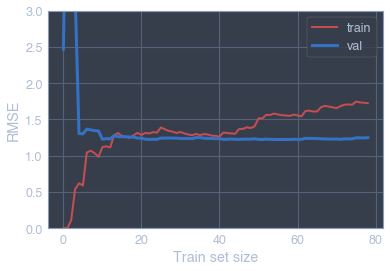

In [22]:
lin_reg = LinearRegression()
plot_learn_curve(lin_reg, X, y)

At the beggining of increasing train set size the model fit train set because number of it's instances are low. then after some new instances curve reach a points which adding or deleting from train set doesn't have very large impact on prediction errors. 

validation at first is very high becasue of badness of model. It trained with low number of trainset instances. Then after raising size validation curve got better but not best. 

This model is an underfitted model.

Now lets look at learning curve of a 10th degree model

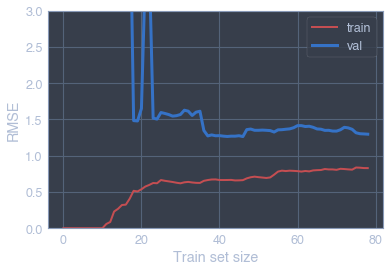

In [23]:
from sklearn.pipeline import Pipeline
poly_reg = Pipeline([
    ('poly_feature', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learn_curve(poly_reg, X, y)

* Error is very lower than linear regression
* It may occure a gap between train and val. It means that model was overfitted and the gap size will reduced with increasing train set size.

# Regularized Linear Models
## Ridge Regression
This kind of Regression add a regularization term $\alpha\sum_{i=1}^{n} \theta_i^2$ to equation.

In [28]:
from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='cholesky', tol=0.001)

In [29]:
ridge_reg.predict([[1.5]])

array([[5.43485472]])

In [31]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel()) 
sgd_reg.predict([[1.5]])

array([5.41902497])

The penalty hyperparameter sets the type of regularization term to use. Specifying "l2" indicates that you want SGD to add a regularization term to the cost function equal to half the square of the ℓ2 norm of the weight vector: this is simply Ridge Regression.

## Lasso Regression
Like ridge, lasso also use regulatization. but in this model tries to minimize coefficient of useless features (zero).

In [32]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.38764951])

## Elastick Net
It is combine of ridge and lasso. In general, Elastic Net is preferred over Lasso since Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.


In [34]:
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_reg.fit(X, y)
elastic_reg.predict([[1.5]])

array([5.38837044])

# Notes : 
* Linear regression like normal distribution prediction. So its better to change our target train to normal distribution. For example a transform $log(1+x)$ may be usefull.